In [1]:
# Dependencies
import pandas as pd

In [2]:
# Name of the CSV file
file = 'movieData_AKP.csv'

In [3]:
# The correct encoding must be used to read the CSV in pandas
df = pd.read_csv(file, index_col=0)
df.head()

,ID,Title,Year,Age,Netflix,Hulu,Prime Video,Disney+,Type,Rating,Runtime (min),Genre,Metascore,Imdb,Rotten Tomatoes,Country,Runtime
0,1,The Irishman,2019,18+,1,0,0,0,0,R,NaN,"Biography, Crime, Drama",94.0,7.8,95%,United States,209 min
1,2,Dangal,2016,7+,1,0,0,0,0,Not Rated,NaN,"Action, Biography, Drama",NaN,8.3,88%,"India, United States",161 min
2,3,David Attenborough: A Life on Our Planet,2020,7+,1,0,0,0,0,PG,NaN,"Documentary, Biography",72.0,8.9,96%,United Kingdom,83 min
3,4,Lagaan: Once Upon a Time in India,2001,7+,1,0,0,0,0,PG,NaN,"Drama, Musical, Sport",84.0,8.1,95%,"India, United States, United Kingdom",224 min
4,5,Roma,2018,18+,1,0,0,0,0,R,NaN,Drama,96.0,7.7,96%,"Mexico, United States",135 min


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
df.dtypes

ID                   int64
Title               object
Year                 int64
Age                 object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Rating              object
Runtime (min)      float64
Genre               object
Metascore          float64
Imdb               float64
Rotten Tomatoes     object
Country             object
Runtime             object
dtype: object

In [6]:
# convert run time to float by removing min and then converting number object into float

# remove min from cell
df['Runtime'] = df['Runtime'].str.replace("min", "")
df['Runtime'].head()

0    209 
1    161 
2     83 
3    224 
4    135 
Name: Runtime, dtype: object

In [7]:
df["Runtime"]

0       209 
1       161 
2        83 
3       224 
4       135 
        ... 
9510     NaN
9511     NaN
9512     NaN
9513     NaN
9514     NaN
Name: Runtime, Length: 9515, dtype: object

In [8]:
df.count()

ID                 9515
Title              9515
Year               9515
Age                5338
Netflix            9515
Hulu               9515
Prime Video        9515
Disney+            9515
Type               9515
Rating              670
Runtime (min)         0
Genre               717
Metascore           568
Imdb                769
Rotten Tomatoes     717
Country             715
Runtime             717
dtype: int64

In [9]:
df = df.drop("Runtime (min)", axis = 1)
df

,ID,Title,Year,Age,Netflix,Hulu,Prime Video,Disney+,Type,Rating,Genre,Metascore,Imdb,Rotten Tomatoes,Country,Runtime
0,1,The Irishman,2019,18+,1,0,0,0,0,R,"Biography, Crime, Drama",94.0,7.8,95%,United States,209
1,2,Dangal,2016,7+,1,0,0,0,0,Not Rated,"Action, Biography, Drama",NaN,8.3,88%,"India, United States",161
2,3,David Attenborough: A Life on Our Planet,2020,7+,1,0,0,0,0,PG,"Documentary, Biography",72.0,8.9,96%,United Kingdom,83
3,4,Lagaan: Once Upon a Time in India,2001,7+,1,0,0,0,0,PG,"Drama, Musical, Sport",84.0,8.1,95%,"India, United States, United Kingdom",224
4,5,Roma,2018,18+,1,0,0,0,0,R,Drama,96.0,7.7,96%,"Mexico, United States",135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,9511,Most Wanted Sharks,2020,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9511,9512,Doc McStuffins: The Doc Is In,2020,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9512,9513,Ultimate Viking Sword,2019,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9513,9514,Hunt for the Abominable Snowman,2011,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dfSubset = df.dropna(subset=['Age','Rating', 'Genre','Metascore','Imdb', 'Rotten Tomatoes', 'Country', 'Runtime'])
dfSubset

,ID,Title,Year,Age,Netflix,Hulu,Prime Video,Disney+,Type,Rating,Genre,Metascore,Imdb,Rotten Tomatoes,Country,Runtime
0,1,The Irishman,2019,18+,1,0,0,0,0,R,"Biography, Crime, Drama",94.0,7.8,95%,United States,209
2,3,David Attenborough: A Life on Our Planet,2020,7+,1,0,0,0,0,PG,"Documentary, Biography",72.0,8.9,96%,United Kingdom,83
3,4,Lagaan: Once Upon a Time in India,2001,7+,1,0,0,0,0,PG,"Drama, Musical, Sport",84.0,8.1,95%,"India, United States, United Kingdom",224
4,5,Roma,2018,18+,1,0,0,0,0,R,Drama,96.0,7.7,96%,"Mexico, United States",135
5,6,To All the Boys I've Loved Before,2018,13+,1,0,0,0,0,TV-14,"Comedy, Drama, Romance",64.0,7.0,96%,United States,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,788,Congo,1995,13+,1,0,0,0,0,PG-13,"Action, Adventure, Mystery",22.0,5.2,22%,United States,109
788,789,The Prom,2020,13+,1,0,0,0,0,PG-13,"Comedy, Drama, Musical",55.0,5.9,54%,United States,130
790,791,The Bling Ring,2013,18+,1,0,0,0,0,R,"Biography, Crime, Drama",66.0,5.6,60%,"United States, United Kingdom, France, Germany...",90
791,792,Greater,2016,7+,1,0,0,0,0,PG,"Biography, Family, Sport",35.0,7.3,69%,United States,130


In [13]:
df.dropna()

,ID,Title,Year,Age,Netflix,Hulu,Prime Video,Disney+,Type,Rating,Genre,Metascore,Imdb,Rotten Tomatoes,Country,Runtime
0,1,The Irishman,2019,18+,1,0,0,0,0,R,"Biography, Crime, Drama",94.0,7.8,95%,United States,209
2,3,David Attenborough: A Life on Our Planet,2020,7+,1,0,0,0,0,PG,"Documentary, Biography",72.0,8.9,96%,United Kingdom,83
3,4,Lagaan: Once Upon a Time in India,2001,7+,1,0,0,0,0,PG,"Drama, Musical, Sport",84.0,8.1,95%,"India, United States, United Kingdom",224
4,5,Roma,2018,18+,1,0,0,0,0,R,Drama,96.0,7.7,96%,"Mexico, United States",135
5,6,To All the Boys I've Loved Before,2018,13+,1,0,0,0,0,TV-14,"Comedy, Drama, Romance",64.0,7.0,96%,United States,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,788,Congo,1995,13+,1,0,0,0,0,PG-13,"Action, Adventure, Mystery",22.0,5.2,22%,United States,109
788,789,The Prom,2020,13+,1,0,0,0,0,PG-13,"Comedy, Drama, Musical",55.0,5.9,54%,United States,130
790,791,The Bling Ring,2013,18+,1,0,0,0,0,R,"Biography, Crime, Drama",66.0,5.6,60%,"United States, United Kingdom, France, Germany...",90
791,792,Greater,2016,7+,1,0,0,0,0,PG,"Biography, Family, Sport",35.0,7.3,69%,United States,130


In [14]:
df.iloc[101,:]

ID                                 102
Title              A Twelve-Year Night
Year                              2018
Age                                18+
Netflix                              1
Hulu                                 0
Prime Video                          0
Disney+                              0
Type                                 0
Rating                             NaN
Genre                              NaN
Metascore                          NaN
Imdb                               7.5
Rotten Tomatoes                    NaN
Country                            NaN
Runtime                            NaN
Name: 101, dtype: object

In [15]:
df.count()

ID                 9515
Title              9515
Year               9515
Age                5338
Netflix            9515
Hulu               9515
Prime Video        9515
Disney+            9515
Type               9515
Rating              670
Genre               717
Metascore           568
Imdb                769
Rotten Tomatoes     717
Country             715
Runtime             717
dtype: int64

In [16]:
df.dtypes

ID                   int64
Title               object
Year                 int64
Age                 object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Rating              object
Genre               object
Metascore          float64
Imdb               float64
Rotten Tomatoes     object
Country             object
Runtime             object
dtype: object

In [17]:
# convert object to float
df["Runtime"] = df['Runtime'].astype(float)
df["Runtime"]

0       209.0
1       161.0
2        83.0
3       224.0
4       135.0
        ...  
9510      NaN
9511      NaN
9512      NaN
9513      NaN
9514      NaN
Name: Runtime, Length: 9515, dtype: float64

In [18]:
df.dtypes

ID                   int64
Title               object
Year                 int64
Age                 object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Rating              object
Genre               object
Metascore          float64
Imdb               float64
Rotten Tomatoes     object
Country             object
Runtime            float64
dtype: object

In [19]:
df.head()

,ID,Title,Year,Age,Netflix,Hulu,Prime Video,Disney+,Type,Rating,Genre,Metascore,Imdb,Rotten Tomatoes,Country,Runtime
0,1,The Irishman,2019,18+,1,0,0,0,0,R,"Biography, Crime, Drama",94.0,7.8,95%,United States,209.0
1,2,Dangal,2016,7+,1,0,0,0,0,Not Rated,"Action, Biography, Drama",NaN,8.3,88%,"India, United States",161.0
2,3,David Attenborough: A Life on Our Planet,2020,7+,1,0,0,0,0,PG,"Documentary, Biography",72.0,8.9,96%,United Kingdom,83.0
3,4,Lagaan: Once Upon a Time in India,2001,7+,1,0,0,0,0,PG,"Drama, Musical, Sport",84.0,8.1,95%,"India, United States, United Kingdom",224.0
4,5,Roma,2018,18+,1,0,0,0,0,R,Drama,96.0,7.7,96%,"Mexico, United States",135.0


In [20]:
df.loc[:,'service'] = df.loc[:,['Netflix', 'Hulu', 'Prime Video', 'Disney+']].idxmax(1)
df

,ID,Title,Year,Age,Netflix,Hulu,Prime Video,Disney+,Type,Rating,Genre,Metascore,Imdb,Rotten Tomatoes,Country,Runtime,service
0,1,The Irishman,2019,18+,1,0,0,0,0,R,"Biography, Crime, Drama",94.0,7.8,95%,United States,209.0,Netflix
1,2,Dangal,2016,7+,1,0,0,0,0,Not Rated,"Action, Biography, Drama",NaN,8.3,88%,"India, United States",161.0,Netflix
2,3,David Attenborough: A Life on Our Planet,2020,7+,1,0,0,0,0,PG,"Documentary, Biography",72.0,8.9,96%,United Kingdom,83.0,Netflix
3,4,Lagaan: Once Upon a Time in India,2001,7+,1,0,0,0,0,PG,"Drama, Musical, Sport",84.0,8.1,95%,"India, United States, United Kingdom",224.0,Netflix
4,5,Roma,2018,18+,1,0,0,0,0,R,Drama,96.0,7.7,96%,"Mexico, United States",135.0,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,9511,Most Wanted Sharks,2020,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disney+
9511,9512,Doc McStuffins: The Doc Is In,2020,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disney+
9512,9513,Ultimate Viking Sword,2019,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disney+
9513,9514,Hunt for the Abominable Snowman,2011,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disney+


In [21]:
groupbyMeanNetflix = df.groupby(["Netflix"])["Runtime"].mean()
summaryNetflixStats = {"Runtime Average Netflix": groupbyMeanNetflix}
summaryNetflixStatsDF = pd.DataFrame(summaryNetflixStats)
summaryNetflixStatsDF.head(2)

,Runtime Average Netflix
Netflix,
0,NaN
1,108.570432


In [22]:
groupbyMeanHulu = df.groupby(["Hulu"])["Runtime"].mean()
# groupbyMeanHulu = groupbyMeanHulu.loc[groupbyMeanHulu[]]

In [23]:
summaryHuluStats = {"Runtime Average Hulu": groupbyMeanHulu}
summaryHuluStatsDF = pd.DataFrame(summaryHuluStats)
summaryHuluStatsDF.head(2)

,Runtime Average Hulu
Hulu,
0,108.443329
1,113.000000


In [24]:
summaryHuluStatsDF = summaryHuluStatsDF.drop([0], axis =0)
summaryHuluStatsDF

,Runtime Average Hulu
Hulu,
1,113.0


In [25]:
groupbyMeanPrime = df.groupby(["Prime Video"])["Runtime"].mean()
groupbyMeanPrime

Prime Video
0    108.475073
1    110.428571
Name: Runtime, dtype: float64

In [26]:
summaryPrimeStats = {"Runtime Average Prime Video": groupbyMeanPrime}
summaryPrimeStatsDF = pd.DataFrame(summaryPrimeStats)
summaryPrimeStatsDF.head(2)

,Runtime Average Prime Video
Prime Video,
0,108.475073
1,110.428571


In [27]:
summaryPrimeStatsDF = summaryPrimeStatsDF.drop([0], axis =0)
summaryPrimeStatsDF

,Runtime Average Prime Video
Prime Video,
1,110.428571


In [28]:
groupbyMeanDisney = df.groupby(["Disney+"])["Runtime"].mean()
groupbyMeanDisney

Disney+
0    108.574825
1    107.000000
Name: Runtime, dtype: float64

In [29]:
summaryDisneyStats = {"Runtime Average Disney": groupbyMeanDisney}
summaryDisneyStatsDF = pd.DataFrame(summaryDisneyStats)
summaryDisneyStatsDF.head(2)

,Runtime Average Disney
Disney+,
0,108.574825
1,107.000000


In [30]:
summaryDisneyStatsDF = summaryDisneyStatsDF.drop([0], axis =0)
summaryDisneyStatsDF

,Runtime Average Disney
Disney+,
1,107.0


In [31]:
# merge all the summary stats per platform
resetNetflixIndex = summaryNetflixStatsDF.rename(index={'Netflix': ''})
resetNetflixIndex

,Runtime Average Netflix
Netflix,
0,NaN
1,108.570432


In [32]:
mergeNHDF = summaryNetflixStatsDF.merge(summaryHuluStatsDF, left_on='Netflix', right_index = True)
mergeNHDF

,Runtime Average Netflix,Runtime Average Hulu
Netflix,,
1,108.570432,113.0


In [33]:
mergeNHPDF = mergeNHDF.merge(summaryPrimeStatsDF, left_on ='Netflix', right_index = True)
mergeNHPDF

,Runtime Average Netflix,Runtime Average Hulu,Runtime Average Prime Video
Netflix,,,
1,108.570432,113.0,110.428571


In [34]:
mergeAllDF = mergeNHPDF.merge(summaryDisneyStatsDF, left_on ='Netflix', right_index = True)
mergeAllDF

,Runtime Average Netflix,Runtime Average Hulu,Runtime Average Prime Video,Runtime Average Disney
Netflix,,,,
1,108.570432,113.0,110.428571,107.0


In [35]:
mergeAllDF.index.name = None
mergeAllDF

,Runtime Average Netflix,Runtime Average Hulu,Runtime Average Prime Video,Runtime Average Disney
1,108.570432,113.0,110.428571,107.0


In [36]:
platformList = ['Netflix', 'Hulu', 'Prime Video', 'Disney']
x_axis = np.arange(len(platformList))

In [37]:
# list of mergeAllDF average runtimes by platform
runtime = mergeAllDF.squeeze()
runtime

Runtime Average Netflix        108.570432
Runtime Average Hulu           113.000000
Runtime Average Prime Video    110.428571
Runtime Average Disney         107.000000
Name: 1, dtype: float64

Text(23.875, 0.5, 'Average Movie Runtime (min)')

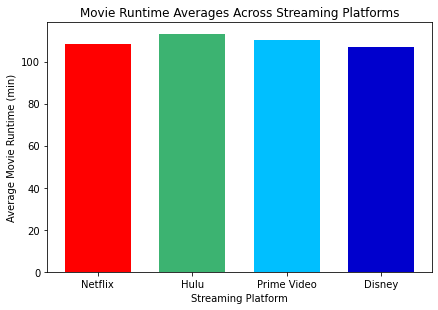

In [38]:
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks

# Create ticks for our bar chart's x-values
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, platformList)

# plot bar chart
plt.bar(x_axis, runtime, color= ['red', 'mediumseagreen', 'deepskyblue', 'mediumblue'], align="center", width = 0.7)
plt.tight_layout()

# Give our chart some labels and a tile
plt.title("Movie Runtime Averages Across Streaming Platforms")
plt.xlabel("Streaming Platform")
plt.ylabel("Average Movie Runtime (min)")

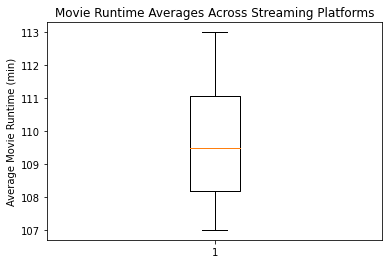

In [40]:
# plot a box plot

fig1, ax1 = plt.subplots()
ax1.set_title("Movie Runtime Averages Across Streaming Platforms")
ax1.set_ylabel("Average Movie Runtime (min)")
ax1.boxplot(runtime)
plt.show()

In [42]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = runtime.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of runtimes is: {lowerq}")
print(f"The upper quartile of runtimes is: {upperq}")
print(f"The interquartile range of runtimes is: {iqr}")
print(f"The the median of runtimes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of runtimes is: 108.17782426778243
The upper quartile of runtimes is: 111.07142857142857
The interquartile range of runtimes is: 2.8936043036461427
The the median of runtimes is: 109.49950189280733 
Values below 103.83741781231322 could be outliers.
Values above 115.41183502689779 could be outliers.


In [ ]:
x= ["Netflix", "Netflix1", "Netflix2"]
y = NetflixRatings
# y1 = mergeNHPDRatings["Metascore Average Netflix"]
# y2 = mergeNHPDRatings[]

fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()

ax1.bar(x, y, 'g-')
# ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
# ax2.set_ylabel('Y2 data', color='b')

plt.show()

In [ ]:
# Create ticks for our bar chart's x-values
tick_locations=[value for value in x]
plt.xticks(tick_locations, platformList)

# plot bar chart
plt.bar(x, NetflixRatings, color= ['red'], align="center", width = 0.7)
plt.tight_layout()